# Dataset boolean8: NP conjoined by or

Generating sentences of the form

- 1) **c traveled to X or Y, c traveled to neither X nor Y** (contradiction)
- 1) **c went to X or Y, c went to neither X nor Y** (contradiction)
- 1) **c visited X or Y, c visited neither X nor Y** (contradiction)


- 2) **c traveled to X or Y, c didn't travel to X and c didn't travel to Y** (contradiction)
- 2) **c went to X or Y, c didn't go to X and c didn't go to Y** (contradiction)
- 2) **c visited X or Y, c didn't visit X and c didn't visit Y** (contradiction)


- 3) **c traveled to X or Y, d(c) traveled to neither X(W) nor Y(W)** (non-contradiction)
- 3) **c went to X or Y,  d(c) went to neither X(W) nor Y(W)** (non-contradiction)
- 3) **c visited X or Y, d(c) visited neither X(W) nor Y(w)** (non-contradiction)


- 4) **c traveled to X or Y, c didn't travel to X (Y)** (non-contradiction)
- 4) **c went to X or Y, c didn't go to X(Y)** (non-contradiction)
- 4) **c visited X or Y, c didn't visit X(Y)** (non-contradiction)


- 5) **c or d got to the quarter finals last year, neither c nor d got to the quarter finals last year** (contradiction)
- 5) **c or d won the last world cup, neither c nor d won the last world cup** (contradiction)
- 5) **c or d are in the geopolitical position of e, neither c nor d are in the geopolitical position of e** (contradiction)


- 6) **c or d got to the quarter finals last year, c didn't get to the quarter finals last year and d didn't get to the quarter finals last year** (contradiction)
- 6) **c or d won the last world cup, c didn't win the last world cup and d didn't win the last world cup** (contradiction)
- 6) **c or d are in the geopolitical position of e, c isn't in the geopolitical position of e and d isn't in the geopolitical position of e ** (contradiction)


- 7) **c or d got to the quarter finals last year, neither c(e) nor d(e) got to the quarter finals last year** (non-contradiction)
- 7) **c or d won the last world cup, neither c(e) nor d(e) won the last world cup** (non-contradiction)
- 7) **c or d are in the geopolitical position of e, neither c(f) nor d(f) are in the geopolitical position of e** (non-contradiction)


- 8) **c or d got to the quarter finals last year, c (d) didn't get to the quarter finals last year** (non-contradiction)
- 8) **c or d won the last world cup, neither c (d) didn't winthe last world cup ** (non-contradiction)
- 8) **c or d are in the geopolitical position of e, c (d) isn't in the geopolitical position of e** (non-contradiction)


In [1]:
import numpy as np
import pandas as pd
from word_lists import name_list, city_list, team_list
import os
import inspect
import sys
import itertools

almost_current = os.path.abspath(inspect.getfile(inspect.currentframe()))
currentdir = os.path.dirname(almost_current)
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)

from plots.functions import plot_histogram_from_labels # noqa

% matplotlib inline

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected

In [2]:
def get_new_item(item_list, src_list):
    size = len(src_list)
    new_item = src_list[np.random.choice(size)]
    while new_item in item_list: 
        new_i = np.random.choice(size)
        new_item = src_list[new_i]
    return new_item

In [3]:
upper_bound = 11000 / 8

### Generating all types of sentences

- 1) **c traveled to X or Y, c traveled to neither X nor Y** (contradiction)
- 1) **c went to X or Y,  c went to neither X nor Y** (contradiction)
- 1) **c visited X or Y, c visited neither X nor Y** (contradiction)

In [4]:
all_sentences_1 = []
for i in range(int(upper_bound)):
    person = get_new_item([], name_list)
    city1 = get_new_item([], city_list)
    city2 = get_new_item([city1], city_list)
    if i % 3 == 0:
        sentence = "{} traveled to {} or {},{} traveled to neither {} nor {}".format(person, city1, city2, person, city1, city2)
    elif i % 3 == 1:
        sentence = "{} went to {} or {},{} went to neither {} nor {}".format(person, city1, city2, person, city1, city2)
    else:
        sentence = "{} has visited {} or {},{} visited neither {} nor {}".format(person, city1, city2, person, city1, city2)
    all_sentences_1.append(sentence)

    
all_sentences_1 = [sentence.split(",") + [1] for sentence in all_sentences_1]

for sentence in all_sentences_1[0:10]:
    print(sentence)


['Angie traveled to Cluj-Napoca or Tulcea', 'Angie traveled to neither Cluj-Napoca nor Tulcea', 1]
['Tina went to Giurgiu or Deva', 'Tina went to neither Giurgiu nor Deva', 1]
['Justin has visited Deva or Craiova', 'Justin visited neither Deva nor Craiova', 1]
['Nora traveled to Turda or Baia Mare', 'Nora traveled to neither Turda nor Baia Mare', 1]
['Cora went to Turda or Lugoj', 'Cora went to neither Turda nor Lugoj', 1]
['Clinton has visited Craiova or Slobozia', 'Clinton visited neither Craiova nor Slobozia', 1]
['Hazel traveled to Craiova or Slatina', 'Hazel traveled to neither Craiova nor Slatina', 1]
['Constance went to Cluj-Napoca or Slobozia', 'Constance went to neither Cluj-Napoca nor Slobozia', 1]
['Roger has visited Blaj or Bucharest', 'Roger visited neither Blaj nor Bucharest', 1]
['Johnny traveled to Cluj-Napoca or Blaj', 'Johnny traveled to neither Cluj-Napoca nor Blaj', 1]


- 2) **c traveled to X or Y, c didn't travel to X and c didn't travel to Y** (contradiction)
- 2) **c went to X or Y, c didn't go to X and c didn't go to Y** (contradiction)
- 2) **c visited X or Y, c didn't visit X and c didn't visit Y** (contradiction)

In [5]:
all_sentences_2 = []
for i in range(int(upper_bound)):
    person = get_new_item([], name_list)
    city1 = get_new_item([], city_list)
    city2 = get_new_item([city1], city_list)
    if i % 3 == 0:
        sentence = "{} traveled to {} or {},{} didn't travel to {} and {} didn't travel to {}".format(person,
                                                                                                      city1,
                                                                                                      city2,
                                                                                                      person,
                                                                                                      city1,
                                                                                                      person,
                                                                                                      city2)
    elif i % 3 == 1:
        sentence = "{} went to {} or {},{} didn't go to {} and {} didn't go to {}".format(person,
                                                                                          city1,
                                                                                          city2,
                                                                                          person,
                                                                                          city1,
                                                                                          person,
                                                                                          city2)
    else:
        sentence = "{} has visited {} or {},{} didn't visit {} and {} didn't visit {}".format(person,
                                                                                              city1,
                                                                                              city2,
                                                                                              person,
                                                                                              city1,
                                                                                              person,
                                                                                              city2)
    
    all_sentences_2.append(sentence)

    
all_sentences_2 = [sentence.split(",") + [1] for sentence in all_sentences_2]

for sentence in all_sentences_2[0:10]:
    print(sentence)


['Edith traveled to Blaj or Vaslui', "Edith didn't travel to Blaj and Edith didn't travel to Vaslui", 1]
['Charlotte went to Hunedoara or Vaslui', "Charlotte didn't go to Hunedoara and Charlotte didn't go to Vaslui", 1]
['Eduardo has visited Cluj-Napoca or Craiova', "Eduardo didn't visit Cluj-Napoca and Eduardo didn't visit Craiova", 1]
['Beth traveled to Turda or Hunedoara', "Beth didn't travel to Turda and Beth didn't travel to Hunedoara", 1]
['Priscilla went to Lugoj or Vaslui', "Priscilla didn't go to Lugoj and Priscilla didn't go to Vaslui", 1]
['Margie has visited Timisoara or Hunedoara', "Margie didn't visit Timisoara and Margie didn't visit Hunedoara", 1]
['Tyler traveled to Hunedoara or Baia Mare', "Tyler didn't travel to Hunedoara and Tyler didn't travel to Baia Mare", 1]
['Joshua went to Craiova or Lugoj', "Joshua didn't go to Craiova and Joshua didn't go to Lugoj", 1]
['Catherine has visited Bucharest or Oradea', "Catherine didn't visit Bucharest and Catherine didn't visit 

- 3) **c traveled to X or Y, d(c) traveled to neither X(W) nor Y(W)** (non-contradiction)
- 3) **c went to X or Y,  d(c) went to neither X(W) nor Y(W)** (non-contradiction)
- 3) **c visited X or Y, d(c) visited neither X(W) nor Y(w)** (non-contradiction)

In [6]:
all_sentences_3 = []
for i in range(int(upper_bound)):
    person = get_new_item([], name_list)
    other_person = get_new_item([person], name_list)
    city1 = get_new_item([], city_list)
    city2 = get_new_item([city1], city_list)
    city3 = get_new_item([city1, city2], city_list)
    
    if i % 2 == 0:
        person_p = other_person
        city_p_1 = city1
        city_p_2 = city2
    else:
        person_p = person
        if i % 3:
            city_p_1 = city3
            city_p_2 = city2
        else:
            city_p_1 = city1
            city_p_2 = city3
    
    if i % 3 == 0:
        sentence = "{} traveled to {} or {},{} traveled to neither {} nor {}".format(person,
                                                                                     city1,
                                                                                     city2,
                                                                                     person_p,
                                                                                     city_p_1,
                                                                                     city_p_2)
    elif i % 3 == 1:
        sentence = "{} went to {} or {},{} went to neither {} nor {}".format(person,
                                                                             city1,
                                                                             city2,
                                                                             person_p,
                                                                             city_p_1,
                                                                             city_p_2)
    else:
        sentence = "{} has visited {} or {},{} visited neither {} nor {}".format(person,
                                                                                 city1,
                                                                                 city2,
                                                                                 person_p,
                                                                                 city_p_1,
                                                                                 city_p_2)        
        
    all_sentences_3.append(sentence)

    
all_sentences_3 = [sentence.split(",") + [0] for sentence in all_sentences_3]

for sentence in all_sentences_3[0:10]:
    print(sentence)


['Billy traveled to Cluj-Napoca or Giurgiu', 'Pauline traveled to neither Cluj-Napoca nor Giurgiu', 0]
['Molly went to Bucharest or Reghin', 'Molly went to neither Dej nor Reghin', 0]
['Jodi has visited Slatina or Lugoj', 'Duane visited neither Slatina nor Lugoj', 0]
['Freddie traveled to Tulcea or Deva', 'Freddie traveled to neither Tulcea nor Hunedoara', 0]
['Alberta went to Slobozia or Reghin', 'Floyd went to neither Slobozia nor Reghin', 0]
['Alberto has visited Deva or Giurgiu', 'Alberto visited neither Turda nor Giurgiu', 0]
['Albert traveled to Reghin or Dej', 'Alison traveled to neither Reghin nor Dej', 0]
['Genevieve went to Vaslui or Lugoj', 'Genevieve went to neither Deva nor Lugoj', 0]
['Esther has visited Cluj-Napoca or Craiova', 'Margaret visited neither Cluj-Napoca nor Craiova', 0]
['Tony traveled to Hunedoara or Oradea', 'Tony traveled to neither Hunedoara nor Bucharest', 0]


- 4) **c traveled to X or Y, c didn't travel to X (Y)** (non-contradiction)
- 4) **c went to X or Y, c didn't go to X(Y)** (non-contradiction)
- 4) **c visited X or Y, c didn't visit X(Y)** (non-contradiction)

In [7]:
all_sentences_4 = []
for i in range(int(upper_bound)):
    person = get_new_item([], name_list)
    city1 = get_new_item([], city_list)
    city2 = get_new_item([city1], city_list)
    
    if i % 2 == 0:
        city3 = city1
    else:
        city3 = city2

    if i % 3 == 0:
        sentence = "{} traveled to {} or {},{} didn't travel to {}".format(person,
                                                                           city1,
                                                                           city2,
                                                                           person,
                                                                           city3)
    elif i % 3 == 1:
        sentence = "{} went to {} or {},{} didn't go to {}".format(person,
                                                                   city1,
                                                                   city2,
                                                                   person,
                                                                   city3)
    else:
        sentence = "{} has visited {} or {},{} didn't visit {}".format(person,
                                                                       city1,
                                                                       city2,
                                                                       person,
                                                                       city3)
    
    all_sentences_4.append(sentence)

    
all_sentences_4 = [sentence.split(",") + [0] for sentence in all_sentences_4]

for sentence in all_sentences_4[0:10]:
    print(sentence)

['Rosemary traveled to Turda or Timisoara', "Rosemary didn't travel to Turda", 0]
['Sue went to Tulcea or Giurgiu', "Sue didn't go to Giurgiu", 0]
['Judy has visited Blaj or Deva', "Judy didn't visit Blaj", 0]
['Nora traveled to Dej or Slobozia', "Nora didn't travel to Slobozia", 0]
['Ivan went to Craiova or Cluj-Napoca', "Ivan didn't go to Craiova", 0]
['Milton has visited Slobozia or Vaslui', "Milton didn't visit Vaslui", 0]
['Sonia traveled to Timisoara or Slatina', "Sonia didn't travel to Timisoara", 0]
['Claire went to Bucharest or Mangalia', "Claire didn't go to Mangalia", 0]
['Marian has visited Baia Mare or Vaslui', "Marian didn't visit Baia Mare", 0]
['Vicki traveled to Arad or Slatina', "Vicki didn't travel to Slatina", 0]


- 5) **c or d got to the quarter finals last year, neither c nor d got to the quarter finals last year** (contradiction)
- 5) **c or d won the last world cup, neither c nor d won the last world cup** (contradiction)
- 5) **c or d are in the geopolitical position of e, neither c nor d are in the geopolitical position of e** (contradiction)

In [8]:
all_sentences_5 = []
for i in range(int(upper_bound)):
    person = get_new_item([], name_list)
    team1 = get_new_item([], team_list)
    team2 = get_new_item([team1], team_list)
    team3 = get_new_item([team1, team2], team_list)
    if i % 3 == 0:
        sentence = "{} or {} got to the quarter finals last year, neither {} nor {} got to the quarter finals last year".format(team1,
                                                                                                                                team2,
                                                                                                                                team1,
                                                                                                                                team2)
    elif i % 3 == 1:
        sentence = "{} or {} won the last world cup, neither {} nor {} won the last world cup".format(team1,
                                                                                                      team2,
                                                                                                      team1,
                                                                                                      team2)    
    else:
        sentence = "{} or {} are in the geopolitical position of {}, neither {} nor {} are in the geopolitical position of {}".format(team1,
                                                                                                                                      team2,
                                                                                                                                      team3,
                                                                                                                                      team1,
                                                                                                                                      team2,
                                                                                                                                      team3)

        
    all_sentences_5.append(sentence)

    
all_sentences_5 = [sentence.split(",") + [1] for sentence in all_sentences_5]

for sentence in all_sentences_5[0:10]:
    print(sentence)


['Tunisia or Nigeria got to the quarter finals last year', ' neither Tunisia nor Nigeria got to the quarter finals last year', 1]
['Morocco or Sweden won the last world cup', ' neither Morocco nor Sweden won the last world cup', 1]
['Peru or Iran are in the geopolitical position of Australia', ' neither Peru nor Iran are in the geopolitical position of Australia', 1]
['Australia or Switzerland  got to the quarter finals last year', ' neither Australia nor Switzerland  got to the quarter finals last year', 1]
['Russia or England won the last world cup', ' neither Russia nor England won the last world cup', 1]
['Brazil or Croatia are in the geopolitical position of Mexico', ' neither Brazil nor Croatia are in the geopolitical position of Mexico', 1]
['Costa Rica or Switzerland  got to the quarter finals last year', ' neither Costa Rica nor Switzerland  got to the quarter finals last year', 1]
['Egypt or Mexico won the last world cup', ' neither Egypt nor Mexico won the last world cup', 1

- 6) **c or d got to the quarter finals last year, c didn't get to the quarter finals last year and d didn't get to the quarter finals last year** (contradiction)
- 6) **c or d won the last world cup, c didn't win the last world cup and d didn't win the last world cup** (contradiction)
- 6) **c or d are in the geopolitical position of e, c isn't in the geopolitical position of e and d isn't in the geopolitical position of e ** (contradiction)

In [9]:
all_sentences_6 = []
for i in range(int(upper_bound)):
    person = get_new_item([], name_list)
    team1 = get_new_item([], team_list)
    team2 = get_new_item([team1], team_list)
    team3 = get_new_item([team1, team2], team_list)
    if i % 3 == 0:
        sentence = "{} or {} got to the quarter finals last year,{} didn't get to the quarter finals last year and {} didn't get to the quarter finals last year".format(team1,
                                                                                                                                team2,
                                                                                                                                team1,
                                                                                                                                team2)
    elif i % 3 == 1:
        sentence = "{} or {} won the last world cup,{} didn't win the last world cup and {} didn't win the last world cup".format(team1,
                                                                                                                                  team2,
                                                                                                                                  team1,
                                                                                                                                  team2)    
    else:
        sentence = "{} or {} are in the geopolitical position of {},{} isn't in the geopolitical position of {} and {} isn't in the geopolitical position of {}".format(team1,
                                                                                                                                                                        team2,
                                                                                                                                                                        team3,
                                                                                                                                                                        team1,
                                                                                                                                                                        team3,
                                                                                                                                                                        team2,
                                                                                                                                                                        team3)

        
    all_sentences_6.append(sentence)

    
all_sentences_6 = [sentence.split(",") + [1] for sentence in all_sentences_6]

for sentence in all_sentences_6[0:10]:
    print(sentence)


['Iran or Japan got to the quarter finals last year', "Iran didn't get to the quarter finals last year and Japan didn't get to the quarter finals last year", 1]
['Denmark or Korea Republic won the last world cup', "Denmark didn't win the last world cup and Korea Republic didn't win the last world cup", 1]
['Spain or Japan are in the geopolitical position of Germany', "Spain isn't in the geopolitical position of Germany and Japan isn't in the geopolitical position of Germany", 1]
['Mexico or Senegal got to the quarter finals last year', "Mexico didn't get to the quarter finals last year and Senegal didn't get to the quarter finals last year", 1]
['Australia or Uruguay won the last world cup', "Australia didn't win the last world cup and Uruguay didn't win the last world cup", 1]
['Portugal or Germany are in the geopolitical position of Costa Rica', "Portugal isn't in the geopolitical position of Costa Rica and Germany isn't in the geopolitical position of Costa Rica", 1]
['Poland or Kor

- 7) **c or d got to the quarter finals last year, neither c(e) nor d(e) got to the quarter finals last year** (non-contradiction)
- 7) **c or d won the last world cup, neither c(e) nor d(e) won the last world cup** (non-contradiction)
- 7) **c or d are in the geopolitical position of e, neither c(f) nor d(f) are in the geopolitical position of e** (non-contradiction)

In [10]:
all_sentences_7 = []
for i in range(int(upper_bound)):
    person = get_new_item([], name_list)
    team1 = get_new_item([], team_list)
    team2 = get_new_item([team1], team_list)
    team3 = get_new_item([team1, team2], team_list)
    team4 = get_new_item([team1, team2, team3], team_list)
    
    if i % 2 == 0:
        team_p_1 = team1 
        team_p_2 = team4
    else:
        team_p_1 = team4
        team_p_2 = team1
    
    if i % 3 == 0:
        sentence = "{} or {} got to the quarter finals last year, neither {} nor {} got to the quarter finals last year".format(team1,
                                                                                                                                team2,
                                                                                                                                team_p_1,
                                                                                                                                team_p_2)
    elif i % 3 == 1:
        sentence = "{} or {} won the last world cup, neither {} nor {} won the last world cup".format(team1,
                                                                                                      team2,
                                                                                                      team_p_1,
                                                                                                      team_p_2)    
    else:
        sentence = "{} or {} are in the geopolitical position of {}, neither {} nor {} are in the geopolitical position of {}".format(team1,
                                                                                                                                      team2,
                                                                                                                                      team3,
                                                                                                                                      team_p_1,
                                                                                                                                      team_p_2,
                                                                                                                                      team3)

        
    all_sentences_7.append(sentence)

    
all_sentences_7 = [sentence.split(",") + [0] for sentence in all_sentences_7]

for sentence in all_sentences_7[0:10]:
    print(sentence)


['Portugal or Tunisia got to the quarter finals last year', ' neither Portugal nor France got to the quarter finals last year', 0]
['Nigeria or Serbia won the last world cup', ' neither Denmark nor Nigeria won the last world cup', 0]
['Senegal or Peru are in the geopolitical position of Uruguay', ' neither Senegal nor Tunisia are in the geopolitical position of Uruguay', 0]
['Egypt or England got to the quarter finals last year', ' neither Belgium nor Egypt got to the quarter finals last year', 0]
['Korea Republic or Iran won the last world cup', ' neither Korea Republic nor Germany won the last world cup', 0]
['Japan or Uruguay are in the geopolitical position of Iceland', ' neither Serbia nor Japan are in the geopolitical position of Iceland', 0]
['Belgium or Spain got to the quarter finals last year', ' neither Belgium nor France got to the quarter finals last year', 0]
['Senegal or Croatia won the last world cup', ' neither Poland nor Senegal won the last world cup', 0]
['Argentina

- 8) **c or d got to the quarter finals last year, c (d) didn't get to the quarter finals last year** (non-contradiction)
- 8) **c or d won the last world cup, neither c (d) didn't winthe last world cup ** (non-contradiction)
- 8) **c or d are in the geopolitical position of e, c (d) isn't in the geopolitical position of e** (non-contradiction)

In [11]:
all_sentences_8 = []
for i in range(int(upper_bound)):
    person = get_new_item([], name_list)
    team1 = get_new_item([], team_list)
    team2 = get_new_item([team1], team_list)
    team3 = get_new_item([team1, team2], team_list)
    if i % 2 == 0:
        team_p = team1 
    else:
        team_p = team2
        
    if i % 3 == 0:
        sentence = "{} or {} got to the quarter finals last year,{} didn't get to the quarter finals last year".format(team1,
                                                                                                                       team2,
                                                                                                                       team_p)
    elif i % 3 == 1:
        sentence = "{} or {} won the last world cup,{} didn't win the last world cup".format(team1,
                                                                                                                                  team2,
                                                                                                                                  team_p)    
    else:
        sentence = "{} or {} are in the geopolitical position of {},{} isn't in the geopolitical position of {}".format(team1,
                                                                                                                        team2,
                                                                                                                        team3,
                                                                                                                        team_p,
                                                                                                                        team3)

        
    all_sentences_8.append(sentence)

    
all_sentences_8 = [sentence.split(",") + [0] for sentence in all_sentences_8]

for sentence in all_sentences_8[0:10]:
    print(sentence)

['Portugal or Costa Rica got to the quarter finals last year', "Portugal didn't get to the quarter finals last year", 0]
['Iran or Peru won the last world cup', "Peru didn't win the last world cup", 0]
['Russia or Saudi Arabia are in the geopolitical position of Japan', "Russia isn't in the geopolitical position of Japan", 0]
['Tunisia or Brazil got to the quarter finals last year', "Brazil didn't get to the quarter finals last year", 0]
['Sweden or England won the last world cup', "Sweden didn't win the last world cup", 0]
['Nigeria or Iceland are in the geopolitical position of Croatia', "Iceland isn't in the geopolitical position of Croatia", 0]
['Senegal or Germany got to the quarter finals last year', "Senegal didn't get to the quarter finals last year", 0]
['Panama or Serbia won the last world cup', "Serbia didn't win the last world cup", 0]
['Japan or Denmark are in the geopolitical position of England', "Japan isn't in the geopolitical position of England", 0]
['Saudi Arabia or

In [12]:
np.random.shuffle(all_sentences_1)
np.random.shuffle(all_sentences_2)
np.random.shuffle(all_sentences_3)
np.random.shuffle(all_sentences_4)
np.random.shuffle(all_sentences_5)
np.random.shuffle(all_sentences_6)
np.random.shuffle(all_sentences_7)
np.random.shuffle(all_sentences_8)


size1 = len(all_sentences_1)
size2 = len(all_sentences_2)
size3 = len(all_sentences_3)
size4 = len(all_sentences_4)
size5 = len(all_sentences_5)
size6 = len(all_sentences_6)
size7 = len(all_sentences_7)
size8 = len(all_sentences_8)

all_sentences = all_sentences_1 + all_sentences_2 + all_sentences_3 + all_sentences_4
all_sentences += all_sentences_5 + all_sentences_6 + all_sentences_7 + all_sentences_8
size = len(all_sentences)

print("type 1 size = {}".format(size1))
print("type 2 size = {}".format(size2))
print("type 3 size = {}".format(size3))
print("type 4 size = {}".format(size4))
print("type 5 size = {}".format(size5))
print("type 6 size = {}".format(size6))
print("type 7 size = {}".format(size7))
print("type 8 size = {}".format(size8))
print("total size = {}".format(size))

type 1 size = 1375
type 2 size = 1375
type 3 size = 1375
type 4 size = 1375
type 5 size = 1375
type 6 size = 1375
type 7 size = 1375
type 8 size = 1375
total size = 11000


### Generating a train DataFrame with 10000 examples and a test DataFrame with 1000 examples 

In [13]:
sentence_1 = [triple[0] for triple in all_sentences]
sentence_2 = [triple[1] for triple in all_sentences]
label = [triple[2] for triple in all_sentences]

df_dict = {"sentence1": sentence_1,
           "sentence2": sentence_2,
           "label": label}
        
df = pd.DataFrame(df_dict)
df = df[["sentence1", "sentence2", "label"]]
df = df.sample(frac=1).reset_index(drop=True)

df_train = df.iloc[:10000]
df_test = df.iloc[10000:]

df.tail()    

,sentence1,sentence2,label
10995,Spain or Poland are in the geopolitical positi...,Spain isn't in the geopolitical position of Sw...,1
10996,Japan or Tunisia are in the geopolitical posit...,neither Japan nor Tunisia are in the geopolit...,1
10997,Tunisia or Korea Republic are in the geopoliti...,neither Tunisia nor Panama are in the geopoli...,0
10998,Larry went to Hunedoara or Craiova,Sonia went to neither Hunedoara nor Craiova,0
10999,Marsha traveled to Giurgiu or Turda,Marsha traveled to neither Giurgiu nor Timisoara,0


#### Looking at the label distribution

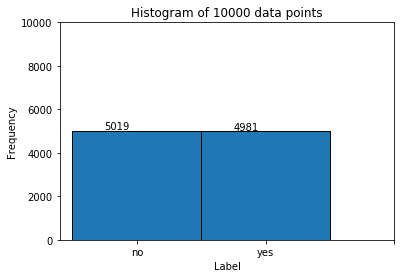

In [14]:
train_label = df_train["label"].values
plot_histogram_from_labels(train_label, ["no", "yes"], "boolean8_train.png")

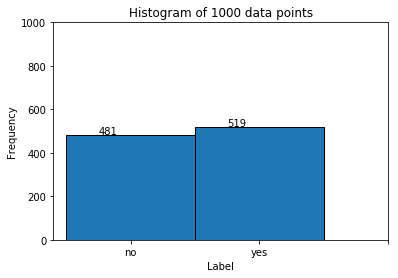

In [15]:
test_label = df_test["label"].values
plot_histogram_from_labels(test_label, ["no", "yes"], "boolean8_test.png")

### Saving to CSV

In [16]:
df_train.to_csv("boolean8_train.csv", index=False)
df_test.to_csv("boolean8_test.csv", index=False)